In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("C:/Users/LENOVO/Downloads/traffic_accidents.csv")

In [5]:
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


# This dataset contains traffic accident records with details about time, weather, road conditions, crash types, and injury severity. The objective of this analysis is to identify patterns in traffic accidents.

# df.info()
- What it shows

Number of rows & columns

Column names

Data types (int, float, object)

Non-null count per column

Memory usage

-What it shows (numeric columns only)

Count

Mean

Standard deviation

Min / Max

Quartiles (25%, 50%, 75%)

In [6]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


# Missing value analysis was performed to identify columns with incomplete data. Columns with higher missing values were examined carefully before further analysis.
- What does df.isnull().sum() do?
- It counts missing values in each column so I can assess data quality before analysis.”

In [7]:
df.isnull().sum().sort_values(ascending=False).head(24)


crash_date                       0
traffic_control_device           0
crash_day_of_week                0
crash_hour                       0
injuries_no_indication           0
injuries_reported_not_evident    0
injuries_non_incapacitating      0
injuries_incapacitating          0
injuries_fatal                   0
injuries_total                   0
most_severe_injury               0
num_units                        0
prim_contributory_cause          0
damage                           0
intersection_related_i           0
crash_type                       0
road_defect                      0
roadway_surface_cond             0
alignment                        0
trafficway_type                  0
first_crash_type                 0
lighting_condition               0
weather_condition                0
crash_month                      0
dtype: int64

# there are no missing values
- if there was use code below

In [8]:
df.drop_duplicates(inplace=True)


# countplot is a Seaborn plot used to:

 - Count the number of occurrences of each category in a column and display them as bars
 - You use it when your data is categorical (days, types, conditions, etc.
 - Basic Syntax
   sns.countplot(x='column_name', data=df)
- OR

  sns.countplot(y='column_name', data=df)



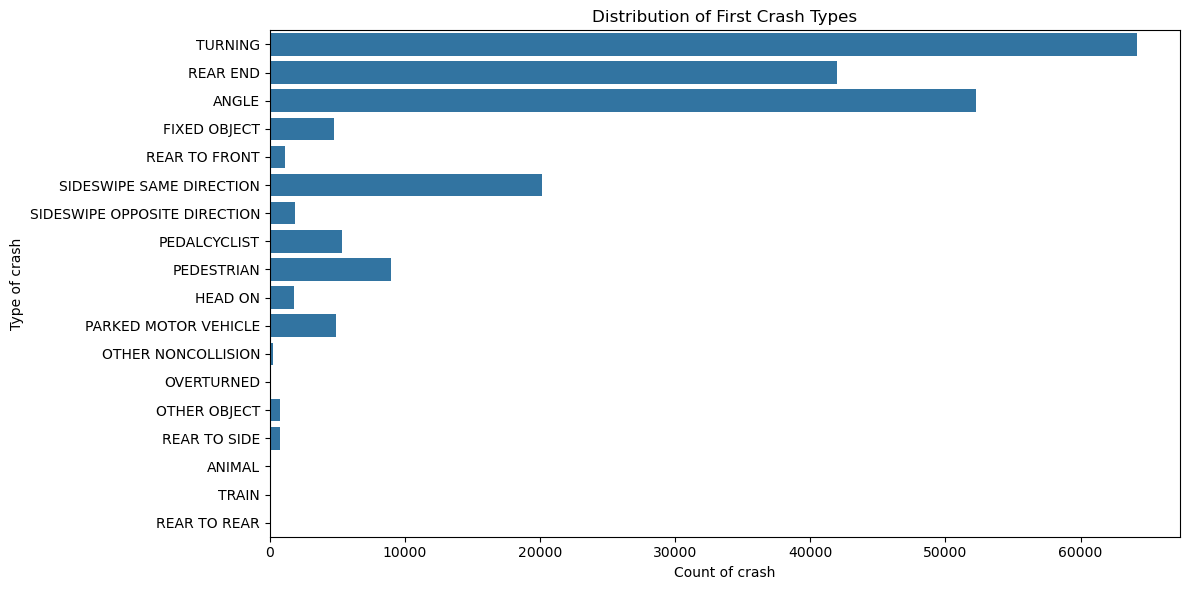

In [9]:
plt.figure(figsize=(12,6))
ax = sns.countplot(y='first_crash_type', data=df)

ax.set_title("Distribution of First Crash Types")
ax.set_ylabel("Type of crash")
ax.set_xlabel("Count of crash")

# ✅ SAVE USING THE FIGURE OBJECT
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("images/first_crash_type_distribution.png")

plt.show()


# Turning-related crashes are the most frequent, 
- likely due to the complexity of navigating intersections and judging oncoming traffic.
- Angle crashes, which often occur during turning or signal violations, are also common, highlighting intersections as high-risk locations.

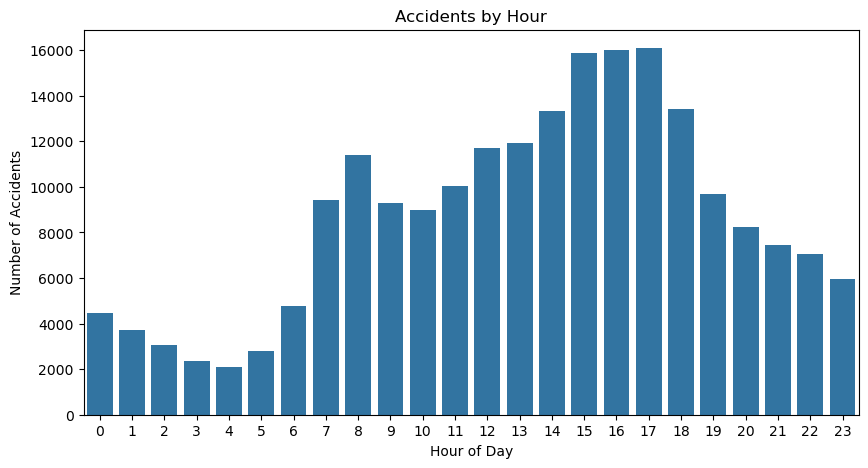

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='crash_hour', data=df)

plt.title("Accidents by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
fig.savefig("images/first_crash_hour_distribution.png")


plt.show()

# Insight:
- A noticeable increase in crashes is observed between 3 PM and 6 PM.
- This time period typically coincides with evening rush hours, when traffic volume -increases due to people commuting from work or school, leading to a higher likelihood of accidents. 

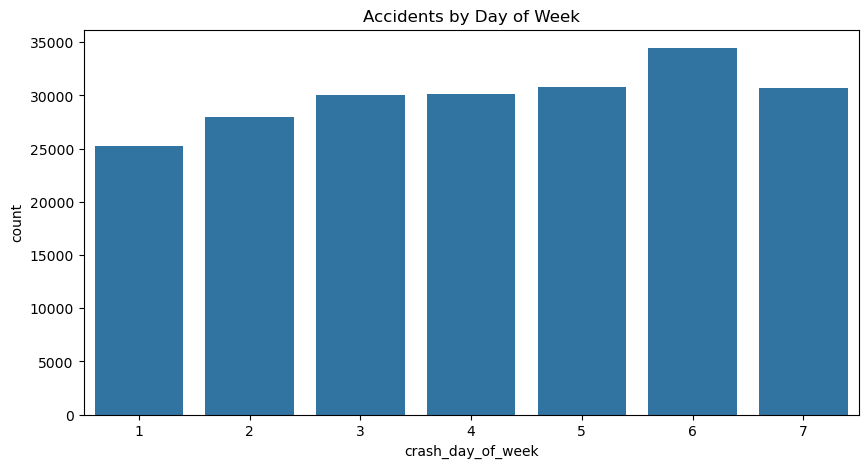

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(
    x='crash_day_of_week',
    data=df,
    order=[1,2,3,4,5,6,7]
)
plt.title("Accidents by Day of Week")
plt.show()


# Insight:
- Accidents are highest on Saturdays, followed by Sundays and Fridays, indicating increased crash frequency during weekends. 
- This pattern may be attributed to higher leisure travel, relaxed driving behavior, and increased night-time travel.
- In contrast, Mondays show fewer crashes, possibly due to more routine and regulated commuting patterns.

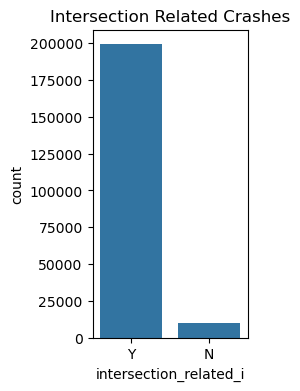

<Figure size 640x480 with 0 Axes>

In [37]:
plt.figure(figsize=(2,4))
sns.countplot(x='intersection_related_i', data=df)
plt.title("Intersection Related Crashes")
plt.show()

plt.savefig("images/intersection_crashes.png", bbox_inches="tight")
plt.show()


In [35]:
df['intersection_related_i'].value_counts(normalize=True) * 100


intersection_related_i
Y    95.230677
N     4.769323
Name: proportion, dtype: float64

# 95% of crashes happen at or near intersections
- 

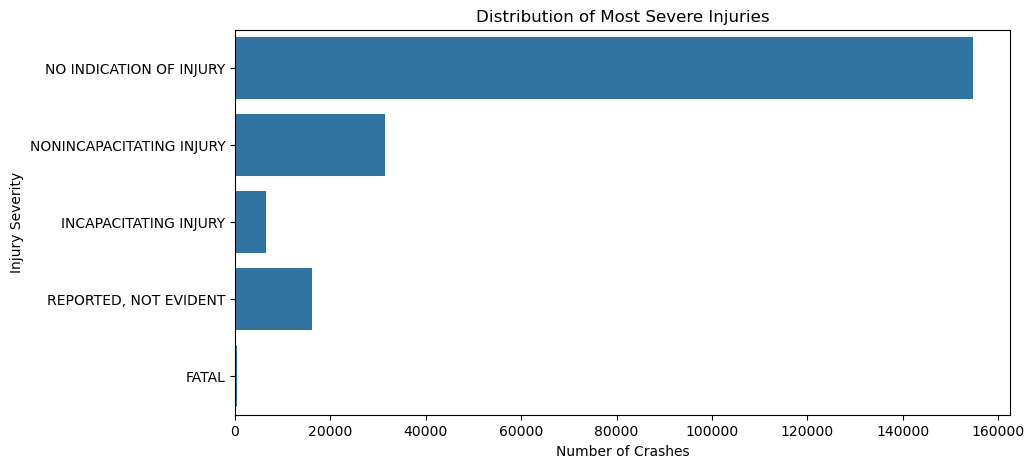

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(y='most_severe_injury', data=df)
plt.title("Distribution of Most Severe Injuries")
plt.xlabel("Number of Crashes")
plt.ylabel("Injury Severity")
plt.savefig("images/most_severe_injury_type_distribution.png")

plt.show()


# Insight:
Most crashes result in no or minor injuries, while severe and fatal injuries occur less frequently, indicating that although accidents are common, high-impact outcomes are relatively rare.

# Key Findings

- Crashes peak during evening hours (3–6 PM), corresponding to high traffic volume.

- Weekend days, especially Saturday, record higher crash counts than weekdays.

- Turning and angle crashes are the most common crash types.

- A large majority of crashes are intersection-related, highlighting intersections as high-risk zones.

- Most crashes result in minor or no injuries.

# Conclusion

This analysis identified clear patterns in traffic accidents related to time of occurrence, crash characteristics, and road infrastructure. Intersections and peak traffic periods were found to be major contributors to crash frequency. These insights emphasize the need for targeted traffic management, improved intersection design, and increased awareness during high-risk periods.